# Dimensionality Reduction Methods LDA and ICA


In this turorial, I would like to introduce two dimensionality reduction methods. One is Linear Discriminant Analysis (LDA), the other one is Independent Component Analysis (ICA). We have known one popular dimensionality reduction method which is Principal Component Analysis (PCA). Here we go on talk about two other methods LDA and ICA and then compare them with the PCA. 

## Linear Discriminant Analysis (LDA)
LDA is a kind of classification method and it could also used for the dimensionality reduction. As we know, PCA reduces the dimensionality by finding some directions in the feature dimensions which could maximize the variance of the data in the smaller dimensions. However, LDA is different. Although, same to PCA, LDA reducing the dimensionality by projecting the labeled points to the lower dimensionality space, LDA want to maximize the distance among different classes and minimize the distance among the same class. We can asume that we are dealing with a problem with only two classes, then we can make the projection function as:
$$y=w^Tx$$
One of the destination of the LDA is to maximize the distance among different classes, then we need to measure the divergence for different classes. We can calculate the center for different class i:
$$c_i=\frac{1}{n_i}\sum_{x\in class i}{x}$$
the projected center:
$$p_i=w^Tc_i$$
then the divergence among the same class is:
$$d_i=\sum_{y\in Y_i}{(y-p_i)^2}$$
We can think of a two classes situation, then we can define the loss function for the projection:
$$J(w)=\frac{|p_1-p_2|^2}{d_1^2+d_2^2}$$
Denominator represents the total divergence of the same class and the numerator represents the distance among different classes. Our goal is to maximize the distance among different classes and minimize the distance within the same class. Thus, we need to maximize the $J(w)$ and find the optimal $w$.
$$d_i=\sum_{y\in Y_i}{(y-p_i)^2}=\sum_{x\in class i}{(w^Tx-w^Tc_i)^2}=\sum_{x\in class i}{w^T(x-c_i)(x-c_i)^Tw}$$
and we know that the $(\sum{x-c_i)(x-c_i)^T}$ is a divergence matrix $D_i$ which describe the divergence in the same class and we will get:
$$d_1^2+d_2^2=w^T(D1+D2)w=w^T(D_c)w$$
$$|p_1-p_2|^2=w^T(D_p)w$$
then the $J(w)$ will have the following form:
$$J(w)=\frac{w^T(D_c)w}{w^T(D_p)w}$$

We can use the Lagrange multiplier to solve the problem and we need to constrain the denominator to have the size 1, otherwise it will have infinite solutions. By using the Lagrange multiplier, we will get:
    $$L(w)=w^TD_cw-\lambda(w^TD_pw-1))$$
    $$\frac{dL(w)}{dw}=2D_cw-2\lambda D_pw=0$$
    $$D_cw=\lambda D_pw$$
Very familiar form, same to PCA, we need to calculate the eigenvalue to solve the problem.
We can then expand it to the N classes. Assume we have the Data set D={($x1,y1$),($x2,y2$)...($x_n,y_n$)}, $n_i$ is the number of data which belongs to class i; $X_i$ is the data collection which belong to class i; $\mu_i$ is the mean of the class i; $\sum_i$ be the covariance matrix of class i; $W_i$ is the projected plane which formed by a series of basis vectors($w1,w2,w3..wd$). Then we will have:
$$argmax J(w)=argmax\frac{W^TD_cW}{W^TD_pW}$$
$D_p$ is the divergence with the intraclass divergence and $D_c$ is the inter-class divergence. We can use the genralized Rayleigh quotient's property and get that if we want to maximum J(w), we only need to do the eigenanalysis for the $D_p^{-1}D_c$.  

So the implementation of the LDA algorithm is:  
input: Dataset D={$(x_1,y_1),(x_2,y_2),...(x_n,y_n)$}, reduce to the d dimension
output: Dataset $D_d$ after demensionality reduction  
(1) Calculate the intraclass divergence $D_p$  
(2) Calculate the inter-class divergence $D_c$  
(3) Calculate the matirx $W = D_p^{-1}D_c$  
(4) Calculate the top d eigenvalues and eigenvectors ($w_1,w_2...w_d$) of the matrix W  
(5) For every data $x_i$ in dataset, do $z_i=W^Tx_i$  
(6) Get the output new projected dataset $D_d={(z_1,y_1)(z_2,y_2)...(z_3,y_3)}$

Now let's compare the PCA with the LDA:  
Commons:  
(1)PCA and LDA are all dimensionality reduction methods  
(2)PCA and LDA all use the eigenvalue decomposition in calculation  
Differences:  
(1)LDA is supervised method, it deals with the data which have labels. PCA is unsupervised method.    
(2)LDA could only reduce to the k-1 dimensions (k is the number of classes), PCA have no restriction.  
(3)LDA choose the projection directions which have the best classification performance. PCA choose the projection directions which have the largest variance.  

Now, let's use an example to show how to use the LDA to do the dimension reduction and compare it with the PCA. We will use the library of the sklearn. The sklearn provides two discriminant analysis module, one is Linear Discriminant Analysis and the other is Quadratic Discriminant Analysis. We can see from the official document["sklearn LDA document"](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis). Here we will consider following methods:  

method|function|
:------|:------|
fit(X, y)	| Fit LinearDiscriminantAnalysis model according to the given training data and parameters.  |
fit_transform($X[, y]$)|	Fit to data, then transform it.  |
predict(X)	|Predict class labels for samples in X.  |
predict_log_proba(X)|	Estimate log probability.  |
predict_proba(X)|	Estimate probability.  |
transform(X)	|Project data to maximize class separation.  |

In this example, we firstly use the sklearn.datasets.samples_generator to generate dataset. Here, we generate 3 classes data and with 4 features. We can see this 4-dimensions data in 4 3-dimensions feature spaces and see its distribution.
- - -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_classification

/usr/local/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


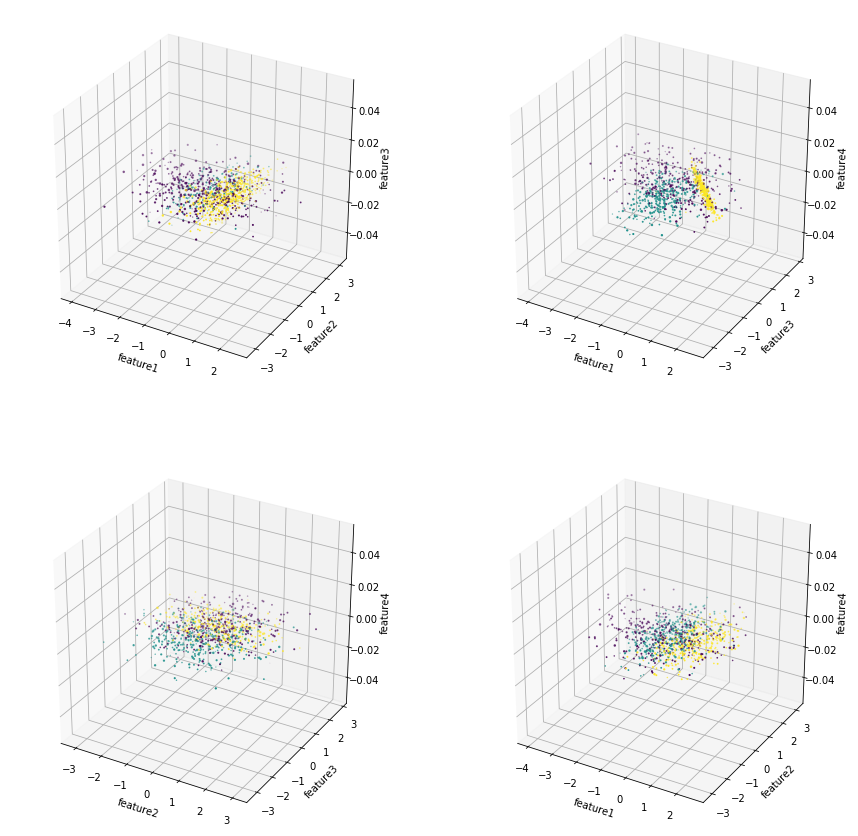

In [2]:

%matplotlib inline

X, y = make_classification(n_samples=2000, n_features=4, n_redundant=0, n_classes=3, n_informative=2,
                           n_clusters_per_class=1,class_sep =0.5, random_state =10)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,2,1, projection='3d')
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature3")
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o',c=y)
ax = fig.add_subplot(2,2,2, projection='3d')
ax.set_xlabel("feature1")
ax.set_ylabel("feature3")
ax.set_zlabel("feature4")
plt.scatter(X[:, 0], X[:, 2], X[:, 3],marker='o',c=y)
ax = fig.add_subplot(2,2,3, projection='3d')
ax.set_xlabel("feature2")
ax.set_ylabel("feature3")
ax.set_zlabel("feature4")
plt.scatter(X[:, 1], X[:, 2], X[:, 3],marker='o',c=y)
ax = fig.add_subplot(2,2,4, projection='3d')
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature4")
plt.scatter(X[:, 0], X[:, 1], X[:, 3],marker='o',c=y)

- - -
Now, let's use the sklearn's LDA to do the linear Discriminant Analysis. We will reduce the dimensionality from four to two. 
- - -

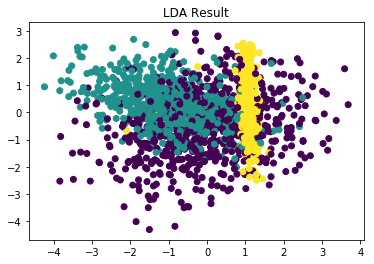

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
plt.figure()
X_new = lda.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y)
plt.title('LDA Result')
plt.show()

- - -
Now, let's use the sklearn's PCA to do the Principle Component Analysis. We will also reduce the dimensionality from four to two. 
- - -

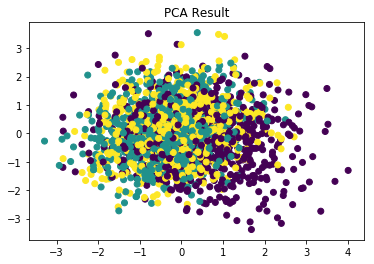

In [4]:
from sklearn.decomposition import  PCA
pca_model = PCA(n_components=2)
pca_X = pca_model.fit_transform(X)  
plt.figure()
plt.scatter(pca_X[:, 0], pca_X[:, 1],marker='o',c=y)
plt.title('PCA Result')
plt.show()

- - -
With our knowledge and previous provement we can see that LDA tends to projected the data to a two dimension space which different classes are obviously seperated. The 3 classes in the first figure are widely seperated and different classes are gathered in different places. However, the PCA result will tend to be very messy, because PCA tends to maximize the variance for the same class instead of seperate them and do the classification. So the variance for each class is very large and seems messy.  
We can see that both LDA and PCA could both do the dimensionality reduction, they all projected the high dimensionality feature space to the low space and keep the original information. We need to judge the situations and choose one of these two methods. For example, if our data is labeled data, we would better to use the LDA to do the dimensionality reduction.
- - -

## Independent Component Analysis (ICA)
Indpendent Component Analysis also project the data to some directions to reduce the dimensionality. However ICA finds the directions such that data projected onto these directions have maximum statistical independence. As we know, PCA want to find the maximum variance and each basis vector in the new space is correlated, however, ICA strictly finds a series of directions(vectors) which are independent to each other. This is the main different, so ICA could behave well in some situations which we want to seperate d independent features from the mixed features. If the situations could satisfy the independent assumption, ICA will always get better result.  
The Implementation of the ICA:  
We have the original n-dimentions data X, we want to projected it into a d-dimentions data P, and we will have a mixture matrix A, and we will have  D=AX. So our goal is to find a matrix W which is the inv(A). That is what ICA does. The process of the ICA is:  
(1) Normalize the input data and make the mean to be 0;  
(2) Do Whitening, calculate the covariance matrix and do the eigenanalysis with the matirx to get the matrix M which formed by eigen values and matix Q which composed with eigen vectors. Then, the whitening matrix Whiten=$M^{-\frac{1}{2}}*O^T$. This step elimates the correlations. We will get the whitening data $D_w$ after whitening.  
(3) Set the reduced dimention d ,iterations times  and initial weight for the matrix W and choose a nonlinear function g.
(4) Calculate the $w_i$ for each i where $w_i=D_wdiag(D_w^TD_w)D_w^T$ and form a matrix W.  
(5) Do the eigenanalysis with W and get a matrix B which formed with eigenvectors.  
(6) Get the mixture matrix $A=B*D_w$  

Here gives an example. Assume we have three source signal, one is sign signal s1, one is square signal s2, the other one is chirp signal s3. We mixed them and use 4 microphone to record these signal (use independent mix model). Now we will have a 4-dimensions data, now we will need to project it to a 3-dimention space. Here we use both ICA and PCA to do the experiments.

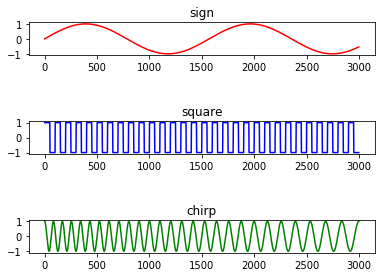

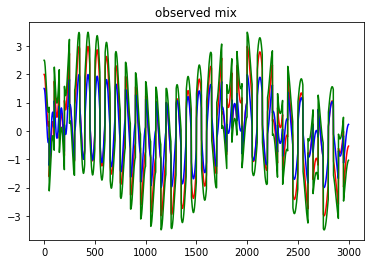

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

# np.random.seed(0)
number = 3000
x = np.linspace(0, 6, number)
signal1 = np.sin(2 * x)  # sign signal
signal2 = signal.square(2*np.pi*5*x)# square signal
signal3= signal.chirp(x, f0=6, f1=1, t1=10, method='linear')# chirp signal
S = np.array([signal1, signal2, signal3]).T

# A = np.array([[1, 1, 1], [0.5, 0.5, 1.0], [1, 1.5, 1.0]])  # Independent Mix model
A = np.array([[1, 1, 1], [0.5, 0.5, 1.0], [1, 1.5, 1.0],[1,1.3,2]])  # Independent Mix model
X = np.dot(S, A.T)  #  Generate the observed signal

S=[signal1,signal2,signal3]
signal_names=["sign","square","chirp"]
colors=["r","b","g"]
plt.figure()
for i, (signal, name,color) in enumerate(zip(S, signal_names,colors), 1):
    plt.subplot(3,1, i)
    plt.title(name)
    plt.plot(signal, color=color)
plt.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=2.0,wspace=2.0)
plt.show()

plt.figure()
plt.title("observed mix")
for s, color in zip(X.T, colors):
    plt.plot(s, color=color)
plt.show()

- - -
The figures above are the source signal and the mixtured signal. The A matrix is a mixture matrix which each column vector is independent. Then, only given the mixed matrix, we will do the ICA for the matrix. We will use the FastICA module in sklearn lib.
- - -

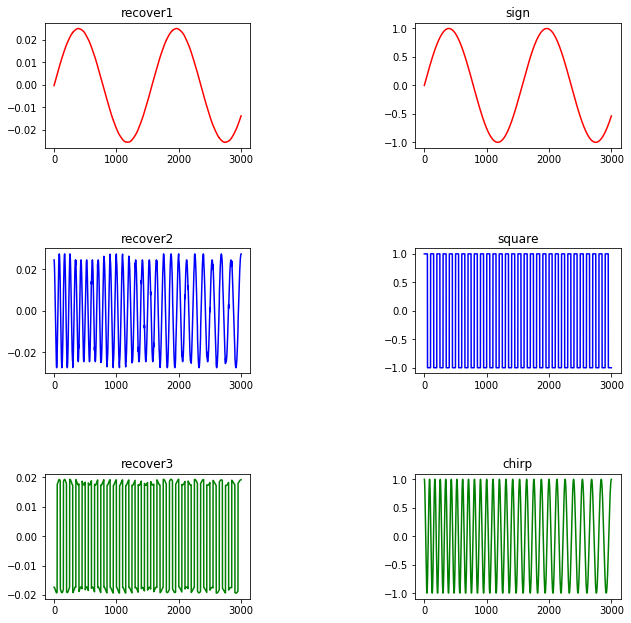

In [33]:
# ICA Model
ica_model = FastICA(n_components=3)
S_Recover = ica_model.fit_transform(X)  # Regcover the signal
A_Estimate = ica_model.mixing_  # Get the estimated mixture matrix A
new_signal_names=["recover1","recover2","recover3"]
colors=["r","b","g"]
plt.figure(figsize=(10,10))
for i, (signal, name,color) in enumerate(zip(S_Recover.T, new_signal_names,colors), 1):
    plt.subplot(3,2, i*2-1)
    plt.title(name)
    plt.plot(signal, color=color)
for i, (signal, name,color) in enumerate(zip(S, signal_names,colors), 1):
    plt.subplot(3,2, i*2)
    plt.title(name)
    plt.plot(signal, color=color)
plt.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.8,wspace=0.8)
plt.show()

- - -
From the figures above we can see that the data has projected to the three original signal dimensions, that is ICA choose the independent vectors in these directions and do the projection. We can see that ICA tends to choose the independent directions to reduce the dimensionality and we can utilize this property and seperate these independent signals. However, the result of the FastICA is not in ordered. We can see that the blue signal after the FastICA should actually be the original green one. Furthermore, the magnitude of the signal also changed. However, the shape of the signal is almost the same. Now, let's have a look at the performance of the PCA.
- - -

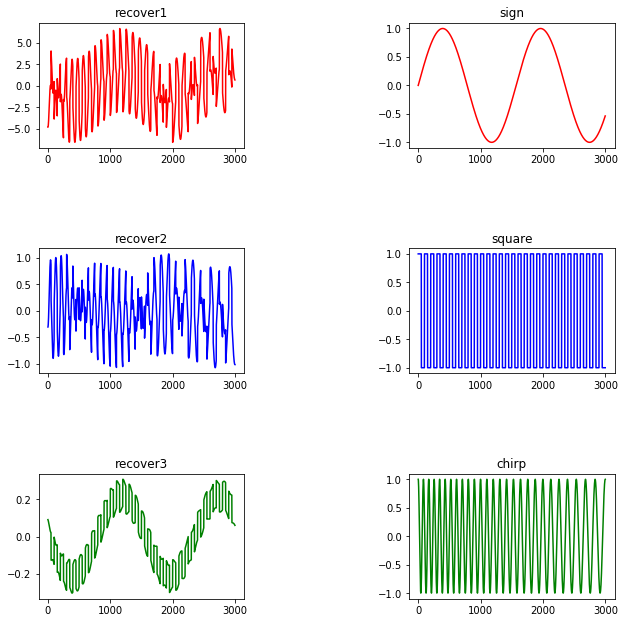

In [9]:
# PCA Model
pca = PCA(n_components=3)
H = pca.fit_transform(X)  

plt.figure()

new_signal_names=["recover1","recover2","recover3"]
colors=["r","b","g"]
plt.figure(figsize=(10,10))
for i, (signal, name,color) in enumerate(zip(H.T, new_signal_names,colors), 1):
    plt.subplot(3,2, i*2-1)
    plt.title(name)
    plt.plot(signal, color=color)
for i, (signal, name,color) in enumerate(zip(S, signal_names,colors), 1):
    plt.subplot(3,2, i*2)
    plt.title(name)
    plt.plot(signal, color=color)
plt.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.8,wspace=0.8)
plt.show()

Obviously, PCA couldn't project the data to 3 independent dimentions and could not seperate these source signals. From the experiments above, we can see that in some situations which have the independency assumption, ICA will get better performance than PCA. ICA have many applications like in processing the pictures and the voice signal and we can utilize the independent property to do the dimentionality reduction.

- - -
In conclusion, this tutorial describe 2 dimensionality reduction methods LDA and ICA. I introduce the theory and the implementation of these two algorithms and use the experiments to describe how to use the library in sklearn to do the ICA and LDA. They have different assumptions and optimized loss function in projections. Thus, we can reduce the dimensionality based on different requirements.
- - -